### Priya Sharma
### PGA Batch 23

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('bank.csv',sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df1=df.copy()
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Separating categorical variables and numerical variables 

In [8]:
cat_cols=df.dtypes[df.dtypes=="object"].index
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [9]:
num_cols=df.dtypes[df.dtypes!="object"].index
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Checking the value counts of cat_cols with a loop

In [10]:
for i in cat_cols:
    x=df[i].value_counts()
    print(f"\n\nValue counts of: {i}\n",x)



Value counts of: job
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Value counts of: marital
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


Value counts of: education
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Value counts of: default
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64


Value counts of: housing
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


Value counts of: loan
 no         33950


# Exploratory Data Analysis 
## `Univariate Analysis`

### Q1 What does the primary analysis of several categorical features reveal?


## Inferences of Below Univariate Analysis

#### Job
* `Majority of the jobs are that of admin(25.3%), blue-collar(22.4%) and technician(16.3%) in the given data.`
* `0.8% of jobs belong to the "unknown" category.`
* `Almost 2.4% of people belong to the "unemployed" category.`

#### Marital
* `Married people constitute more than 60% of the data, 60.5% precisely.`
* `Single people are the second highest, constituting 28% of the data.`
* `11.1% people belong to the "divorced" category.`
* `There are only 0.1% people whose marital status is "unknown".`

#### Education
* `29.5% of people have a university degree.`
* `23.1% of people have completed high school.`
* `Only 0.04% of people belong to the "illiterate" category.`

#### Default
* `79.1% people do not have credit in default while 20.8% remains "unknown".`
* `0.007% people have credit in default.`

#### Housing
* `52.3% of people have housing loan.`
* `45.2% of people does not have housing loan.`
* `2.4% of people' housing loan status is "unknown".`

#### Loan
* `82.4% of people do not have a personal loan.`
* `15.1% of people have a personal loan.`
* `2.4% of people' personal loan status is "unknown".`

#### Contact
* `63.4% of people' communication type is "cellular".`
* `36.5% of people' communication type is "telephone".`

#### Month
* `33.4% people contacted in the month of "may".`
* `Only 0.4% of people contacted in the month of "dec".`

#### Day of Week
* `Maximum people contacted on thurday(20.9%) but the graph for the rest of the days relatively remains the same with merely
   1% variation between the maximum and minimum(friday=19%) calls received on a day.`

#### Poutcome
* `86.3% of outcome of previous marketing campaign remains "nonexistent".`
* `10.3% has been calculated as a "failure".`
* `3.3% was a success.`

#### Y
* `88.7% of people have not subscribed to the term deposit.`
* `11.2% of people have subscribed to the term deposit.`

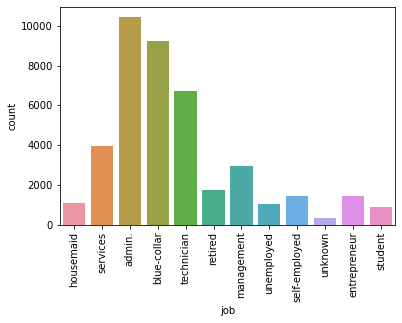

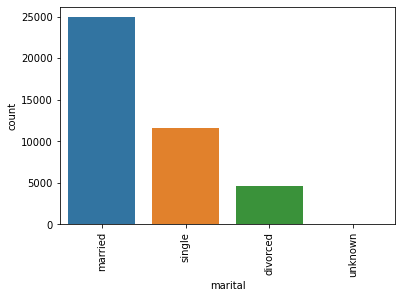

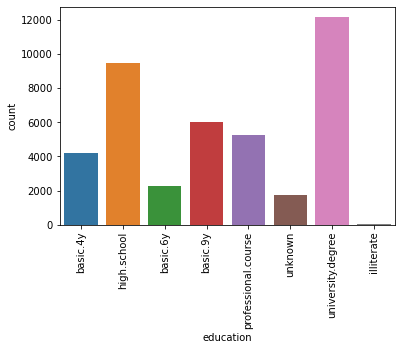

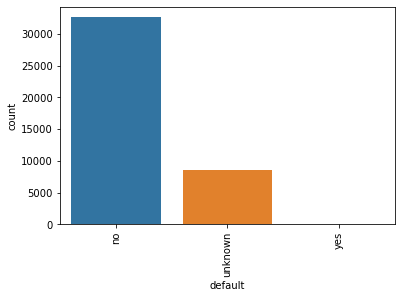

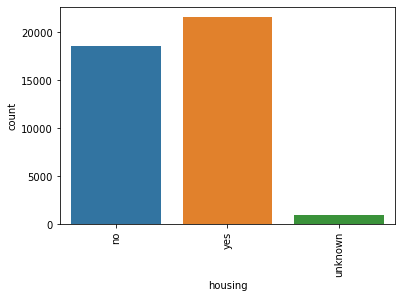

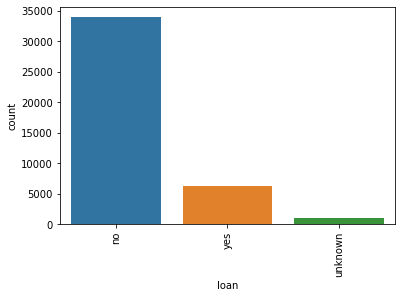

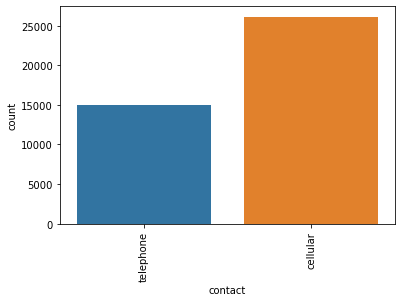

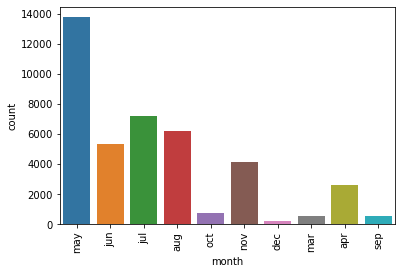

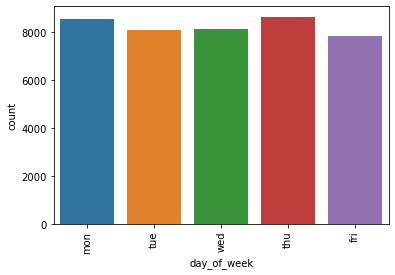

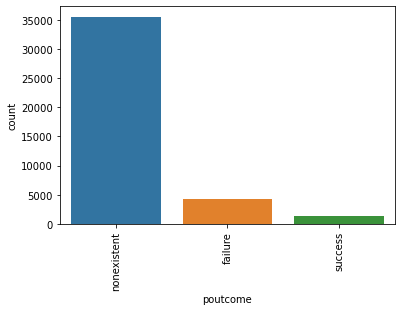

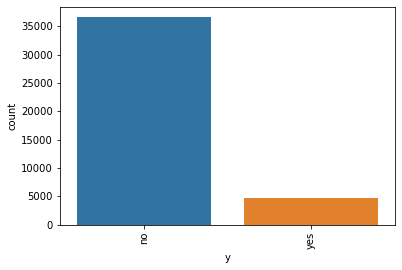

In [11]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.xticks(rotation=90)
    plt.show()

# `Bivariate Analysis`

## Inferences of below Bivariate Analysis

#### Job vs Y(Term Deposit)
* `Maximum number of term deposit is subscribed by people working in the admin department.`
* `People working in "technician" jobs come second in subscribing to the term deposit.`
* `Comment: The bank can target people from categories-"blue collar, "retired" and "service" to futher increase their clients.`

#### Marital vs Y(Term Deposit)
* `Maximum number of term deposit is subscribed by married people.`
* `Least number of term deposit is subscribed by people of categories "divorced" and "unknown".`
* `Comment: The bank can target people from categories-"single" and "divorced" to futher increase their clients.`

#### Education vs Y(Term Deposit)
* `Maximum number of term deposit is subscribed by university degree holders, with highschool passouts as the runner ups.`
* `Least number of term deposit is subscribed by people of categories "basic.6y" and "unknown".`
* `Comment: The bank can target people from categories-"basic.9y", "professional.course" and "basic.4y" to futher increase their clients.`

#### Default vs Y(Term Deposit)
* `Maximum number of term deposit is subscribed by people who do not have credit in default.`
* `Least number of term deposit is subscribed by people who have credit in default.`

#### Housing vs Y(Term Deposit)
* `Maximum number of term deposit is subscribed by people who have a housing loan.`
* `Least number of term deposit is subscribed by people of category:"unknown".`
* `Comment: The bank can target people from categories-"no"(who do not have a housing loan) to futher increase their clients.`

#### Loan vs Y(Term Deposit)
* `Maximum number of term deposit is subscribed by people who do not have a personal loan.`
* `Least number of term deposit is subscribed by people of category:"unknown" and "yes"(people who have a personal loan).`

#### Contact vs Y(Term Deposit)
* `Maximum number of term deposit is subscribed by people who have contacted through "cellular" mode than those who have contacted through "telephone".`

#### Month vs Y(Term Deposit)
* `Maximum number of term deposit is subscribed by people in the month of "may".`
* `Least number of term deposit is subscribed by people in the month of "dec".`
* `Comment: The bank can target people from months-"aug","nov","apr","jun" and "jul" to futher increase their clients.`

#### Day of Week vs Y(Term Deposit)
* `The purchase of the subscription of term deposition seems to have been distributed almost uniformly for every working day of the week.`

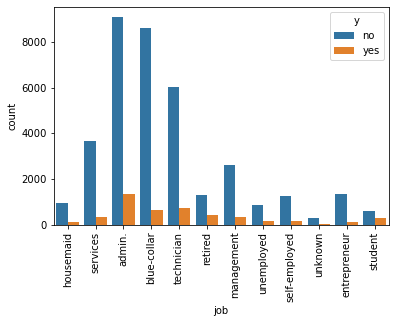

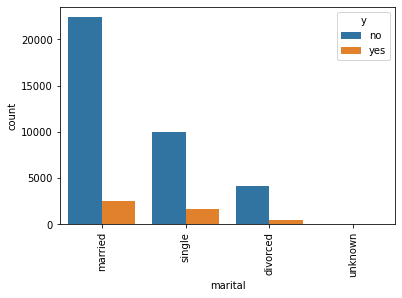

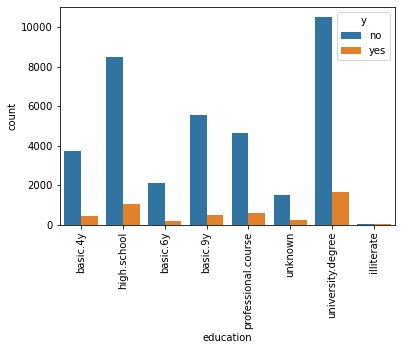

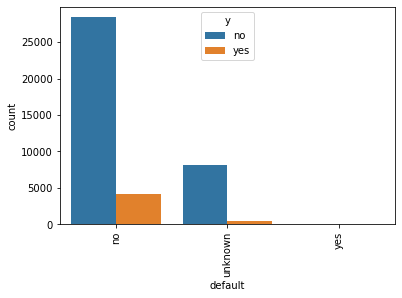

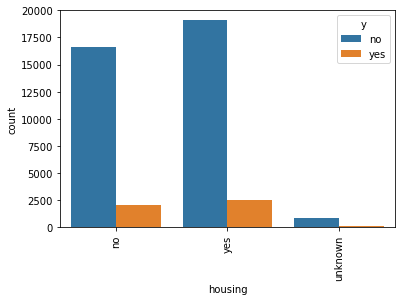

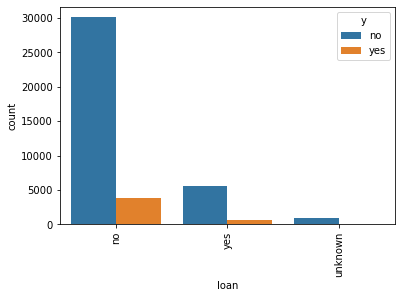

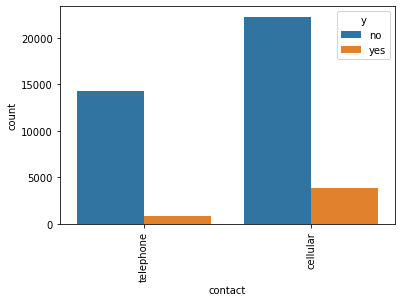

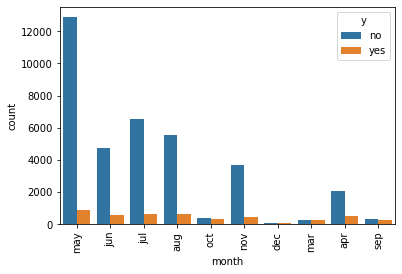

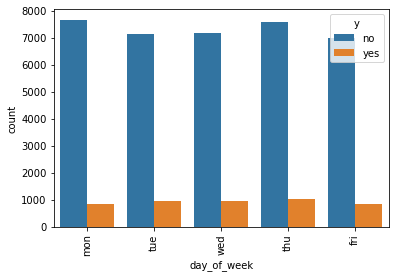

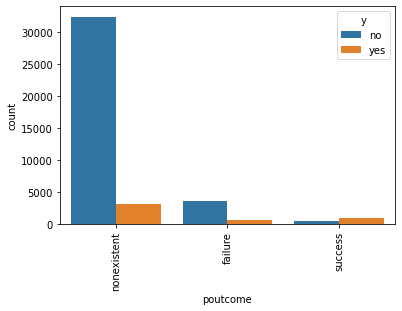

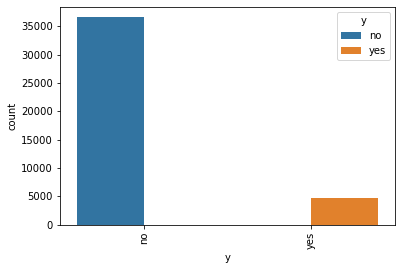

In [12]:
for i in cat_cols:
    sns.countplot(x=df[i],hue=df["y"])
    plt.xticks(rotation=90)
    plt.show()

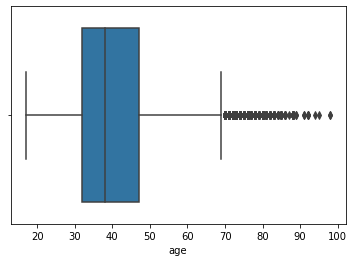

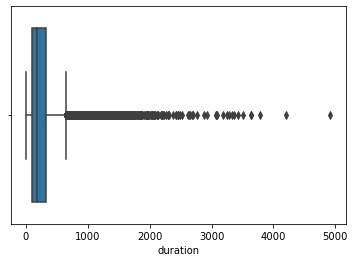

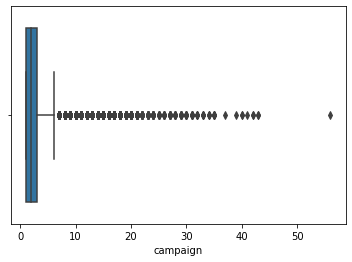

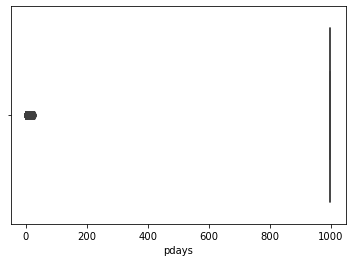

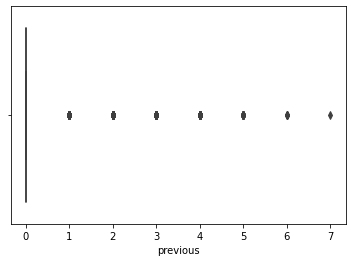

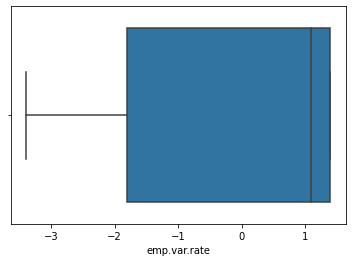

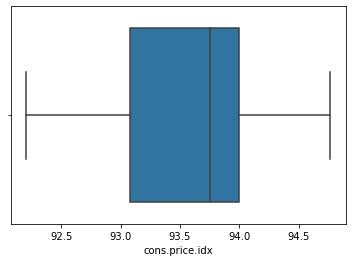

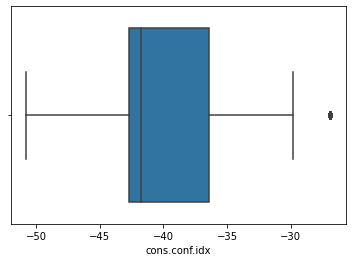

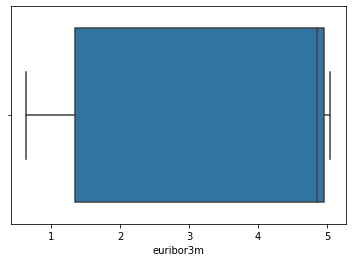

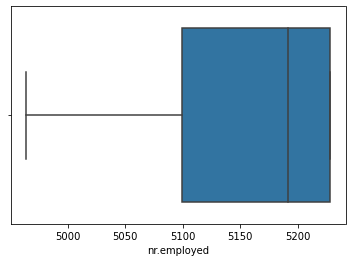

In [13]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

## Outlier Correction

In [14]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [15]:
colsForOutliers=['age', 'duration', 'campaign', 'pdays', 'previous']

In [16]:
def outliers_treatment(x):
    x=x.clip(upper=x.quantile(0.95))
    x=x.clip(lower=x.quantile(0.5))
    return x

In [17]:
df[colsForOutliers]=df[colsForOutliers].apply(outliers_treatment)

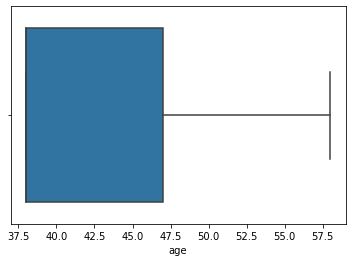

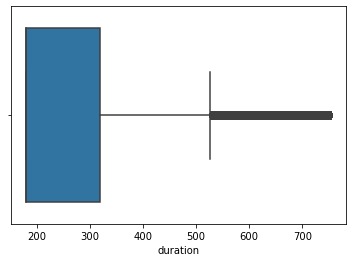

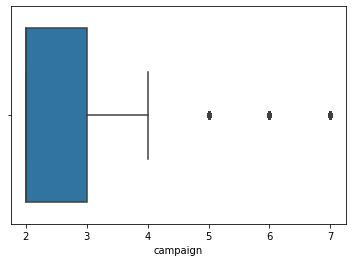

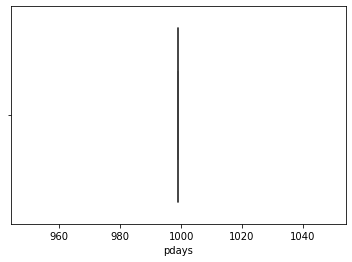

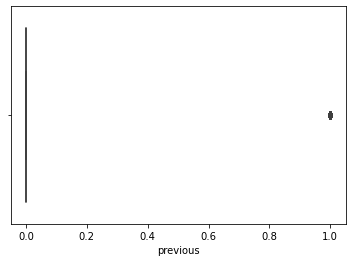

In [18]:
for i in colsForOutliers:
    sns.boxplot(x=df[i])
    plt.show()

### Q2. Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis<br>
b. Label Encoding wherever required<br>
c. Selecting important features based on Random Forest<br>
d. Handling unbalanced data using SMOTE<br>
e. Standardize the data using the anyone of the scalers
provided by sklearn<br>

### a. There are no missing values in the data as we can see below

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### b. LabelEncoding with a loop

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lb=LabelEncoder()
for i in cat_cols:
    df[i]=lb.fit_transform(df[i])

In [22]:
df.dtypes

age               float64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,2.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,2.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,38.0,7,1,3,0,2,0,1,6,1,...,2.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,2.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,2.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [24]:
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [25]:
df1["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### c. Important features as per RandomForest are : 
* ##### `'duration', 'euribor3m', 'age', 'education', 'nr.employed', 'job', as they are equal or higher than the mean value. `
### other important features are:
* ##### `'marital', 'day_of_week', 'campaign', 'poutcome', 'cons.conf.idx', 'pdays' although they fall below the mean value.`

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
x_train=df.drop(["y"],axis=1)
y_train=df["y"]

In [28]:
m1=RandomForestClassifier()
m1.fit(x_train,y_train)
feat_imp=m1.feature_importances_
feat=x_train.columns
print(feat)
print(feat_imp)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
[0.05742093 0.06279848 0.03116121 0.05632268 0.01044431 0.02684641
 0.01904952 0.01213526 0.02001384 0.05102489 0.29771979 0.0338075
 0.         0.01012914 0.04565227 0.02623844 0.02297025 0.02789165
 0.12407625 0.06429717]


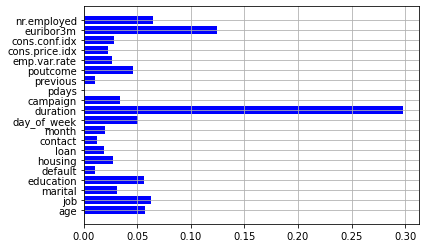

In [29]:
plt.barh(feat,feat_imp,color="blue")
plt.grid()
plt.show()

In [30]:
mean_impf=np.mean(feat_imp)
mean_impf

0.05

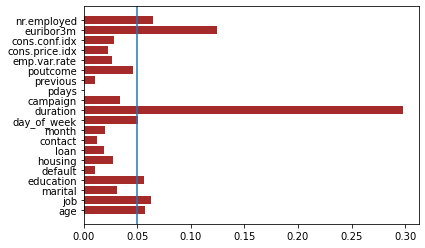

In [31]:
plt.barh(feat,feat_imp,color="brown")
plt.axvline(x=mean_impf)
plt.show()

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### We will be utilising the important features in our model and dropping the less significant features
* `We will be dropping 'duration' variable although it highly affects the output variable("y"), as if duration=0 then y="no". Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic
predictive model.`

In [36]:
df.drop(columns=['duration','housing','loan','emp.var.rate','contact','month','default','pdays','previous'],inplace=True)

In [37]:
df.shape

(41188, 12)

In [38]:
df.columns

Index(['age', 'job', 'marital', 'education', 'day_of_week', 'campaign',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

### d. SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
x=df.drop(["y"],axis=1)
y=df["y"]

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 11)
(10297, 11)
(30891,)
(10297,)


In [42]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [43]:
print(x_sm.shape)
print(x_test.shape)
print(y_sm.shape)
print(y_test.shape)

(54808, 11)
(10297, 11)
(54808,)
(10297,)


### e. StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_sm)
x_test_sc=sc.transform(x_test)

## Q3. Build the following Supervised Learning models:
a. Logistic Regression<br>
b. AdaBoost<br>
c. Naïve Bayes<br>
d. KNN<br>
e. SVM<br>

### a. Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve

In [47]:
m1 = LogisticRegression()
m1.fit(x_train_sc,y_sm)

LogisticRegression()

### Accuracy Score

In [48]:
print('Training Score',m1.score(x_train_sc,y_sm))
print('Testing Score',m1.score(x_test_sc,y_test))

Training Score 0.7226682236169902
Testing Score 0.7364280858502477


In [49]:
ypred_m1 = m1.predict(x_test_sc)

In [50]:
cm_m1  = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[6798 2346]
 [ 368  785]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      9144
           1       0.25      0.68      0.37      1153

    accuracy                           0.74     10297
   macro avg       0.60      0.71      0.60     10297
weighted avg       0.87      0.74      0.78     10297



In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [52]:
def model_metrics2(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    acc_sr=accuracy_score(y_test,ypred)
    pre_sr=precision_score(y_test,ypred)
    rec_sr=recall_score(y_test,ypred)
    cm = confusion_matrix(y_test,ypred)
    class_rep=classification_report(y_test,ypred)
    return cm,class_rep,acc_sr,pre_sr,rec_sr

In [53]:
log_cm,log_cls_rep,log_acc,log_pre,log_rec=model_metrics2(m1,x_sm,x_test,y_sm,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
res=pd.DataFrame(columns=["Model","Acc","Pre","Rec"])
res

,Model,Acc,Pre,Rec


In [55]:
res1=pd.DataFrame({"Model":"Logistic Regression","Acc":log_acc,"Pre":log_pre,"Rec":log_rec},index=[0])
res1

,Model,Acc,Pre,Rec
0,Logistic Regression,0.725066,0.244207,0.694709


### b. AdaBoost

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt1 = DecisionTreeClassifier(max_depth=6,min_samples_split=20,criterion='entropy')  # decision stump
m2 = AdaBoostClassifier(base_estimator=dt1,n_estimators=60)

In [58]:
m2.fit(x_train_sc,y_sm)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=6,
                                                         min_samples_split=20),
                   n_estimators=60)

In [59]:
print('Training Score',m2.score(x_train_sc,y_sm))
print('Testing Score',m2.score(x_test_sc,y_test))

Training Score 0.9366515837104072
Testing Score 0.8733611731572303


In [60]:
ypred_m2 = m2.predict(x_test_sc)

In [61]:
cm_m2  = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2))

[[8542  602]
 [ 702  451]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9144
           1       0.43      0.39      0.41      1153

    accuracy                           0.87     10297
   macro avg       0.68      0.66      0.67     10297
weighted avg       0.87      0.87      0.87     10297



In [62]:
ada_cm,ada_cls_rep,ada_acc,ada_pre,ada_rec=model_metrics2(m2,x_sm,x_test,y_sm,y_test)

In [63]:
res2=pd.DataFrame({"Model":"AdaBoost","Acc":ada_acc,"Pre":ada_pre,"Rec":ada_rec},index=[1])
res2

,Model,Acc,Pre,Rec
1,AdaBoost,0.876954,0.445087,0.400694


In [64]:
params = {'n_estimators':[50,70,80,100],
         'base_estimator':[DecisionTreeClassifier(max_depth=1),
                          DecisionTreeClassifier(max_depth=2,criterion='entropy'),
                          DecisionTreeClassifier(max_depth=3)]}
params

{'n_estimators': [50, 70, 80, 100],
 'base_estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(criterion='entropy', max_depth=2),
  DecisionTreeClassifier(max_depth=3)]}

#### GridSearch is taking a lot of time to run, hence I have commented it. 

In [65]:
# ada = AdaBoostClassifier()
# gs1 = GridSearchCV(estimator=ada, param_grid=params,cv=5)
# gs1.fit(x_train_sc,y_sm)
# gs1.best_params_

### c. Naïve Bayes 

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [67]:
m3=make_pipeline(MinMaxScaler(),MultinomialNB())
m3.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

In [68]:
ypred_m3 = m3.predict(x_test)

In [69]:
cm_m3  = confusion_matrix(y_test,ypred_m3)
print(cm_m3)
print(classification_report(y_test,ypred_m3))

[[9144    0]
 [1153    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9144
           1       0.00      0.00      0.00      1153

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.84     10297



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
mnb_cm,mnb_cls_rep,mnb_acc,mnb_pre,mnb_rec=model_metrics2(m3,x_train,x_test,y_train,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.p

In [71]:
res3=pd.DataFrame({"Model":"MultinomialNB","Acc":mnb_acc,"Pre":mnb_pre,"Rec":mnb_rec},index=[2])
res3

,Model,Acc,Pre,Rec
2,MultinomialNB,0.888026,0.0,0.0


### d. KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train_sc,y_sm)

KNeighborsClassifier(n_neighbors=25)

In [74]:
ypred_knn = knn.predict(x_test_sc)

In [75]:
knn_cm,knn_cls_rep,knn_acc,knn_pre,knn_rec=model_metrics2(knn,x_sm,x_test,y_sm,y_test)

In [76]:
res4=pd.DataFrame({"Model":"KNN","Acc":knn_acc,"Pre":knn_pre,"Rec":knn_rec},index=[3])
res4

,Model,Acc,Pre,Rec
3,KNN,0.750801,0.256631,0.646141


### e. SVM

In [77]:
from sklearn.svm import SVC

In [78]:
params = {'kernel':['linear','rbf'],
         'C':[0.001,0.01,0.1],
         'gamma':[0.01,0.1,1]}

#### SVC + SVC with GridSearch is taking a lot of time to run hence I have commented the code below

In [79]:
# s1 = SVC()
# gs2 = GridSearchCV(s1,param_grid=params)
# gs2.fit(x_train_sc,y_sm)

In [80]:
# s2 = SVC()
# s2.fit(x_train_sc,y_sm)

## Q.4 Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not

A.4 The below tabulated result indicates that AdaBoost Ensemble model has relatively stable results, as well as better Accuracy, Precision and Recall scores than other models. Therefore, it is the preferable model out of the four models in predicting whether client will subscribe to term deposit or not.<br>
* `Note: Although the accuracy of MultinomialNB is seemingly highest, however, its Precision and Recall scores are 0 for our category of focus(1=yes) which makes it the worst of the lot.`

In [81]:
res = pd.concat([res1,res2,res3,res4])
res

,Model,Acc,Pre,Rec
0,Logistic Regression,0.725066,0.244207,0.694709
1,AdaBoost,0.876954,0.445087,0.400694
2,MultinomialNB,0.888026,0.000000,0.000000
3,KNN,0.750801,0.256631,0.646141
